## Image Segmentation using K-Means

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


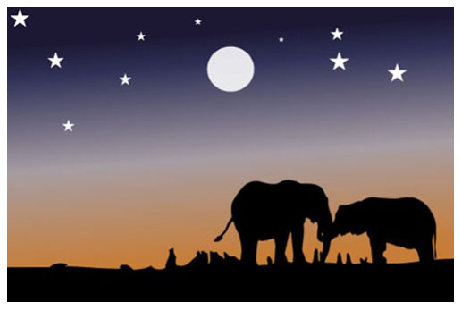

In [2]:
img= cv2.imread('elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.style.use('seaborn')
plt.axis('off')
plt.imshow(img)

plt.show()

In [3]:
all_pixels = img.reshape((-1, 3))
print(all_pixels.shape)

(165000, 3)


In [4]:
from sklearn.cluster import KMeans

In [5]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors, n_jobs = -1)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
km.cluster_centers_

array([[ 98.69372544,  94.85285947, 117.87183223],
       [  1.49597475,   0.83632573,   1.15406   ],
       [174.77987421, 145.24855346, 128.25336478],
       [ 38.01014671,  35.28635682,  64.49065646]])

In [7]:
centres = np.array(km.cluster_centers_, dtype = 'uint8')
print(centres)

[[ 98  94 117]
 [  1   0   1]
 [174 145 128]
 [ 38  35  64]]


#### Plotting the centers

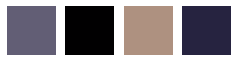

In [8]:
i = 1

plt.figure(0, figsize=(4,2))
colors = []
for each_col in centres:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    #color_swatch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()
    




### Segmenting the image

In [9]:
new_img = np.zeros(all_pixels.shape, dtype = 'uint8')

In [10]:
print(new_img.shape)

(165000, 3)


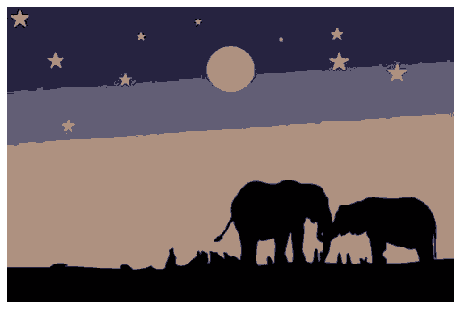

In [11]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape(img.shape)
plt.imshow(new_img)
plt.axis("off")

plt.show()
    

In [14]:
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('segmented_elephant.png', new_img)

True